# Google Playstore App Rating Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("googleplaystore.csv")

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#Dropping the rows which have any null records
df=df.dropna()
df=df.reset_index(drop=True)

In [9]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 950.8+ KB


In [12]:
#Converting the Reviews column into integers
df['Reviews']=df["Reviews"].astype(int)

In [13]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [15]:
def mb_to_kb(a):
  if a.endswith("M"):
    return float(a[:-1])*1000
  elif a.endswith("k"):
    return float(a[:-1])
  else:
    return a

In [16]:
df["Size"]=df["Size"].apply(lambda x:mb_to_kb(x))

In [17]:
df[df["Size"]=="Varies with device"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
35,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
40,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
50,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
65,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
66,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9267,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
9279,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
9307,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
9348,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [18]:
rows=df[df["Size"]=="Varies with device"].index
df.drop(rows,inplace=True)

In [19]:
#Removing the '+' symbol from each value in Installs column
df["Installs"].value_counts()

1,000,000+        1301
100,000+          1037
10,000+            968
10,000,000+        825
1,000+             689
5,000,000+         535
500,000+           490
50,000+            436
5,000+             419
100+               303
100,000,000+       201
500+               197
50,000,000+        147
10+                 67
50+                 56
500,000,000+        30
1,000,000,000+      10
5+                   9
1+                   3
Name: Installs, dtype: int64

In [20]:
df["Installs"]=df["Installs"].str[:-1]
df["Installs"]=df["Installs"].apply(lambda x:x.replace(",",""))

In [21]:
df["Installs"]=df["Installs"].astype(int)

In [22]:
#Removing the '$' sign from the Price Column
df["Price"].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [23]:
df["Price"]=df["Price"].apply(lambda x:x.replace("$",""))
df["Price"]=df["Price"].astype(float)

In [25]:
#Removing the rows with more nummber of rating than installs
df["Rating"].between(0,5).sum()

7723

In [26]:
rows=df[df["Installs"]<df["Reviews"]].index
df.drop(rows,inplace=True)

In [27]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Univariate Analysis

<Axes: >

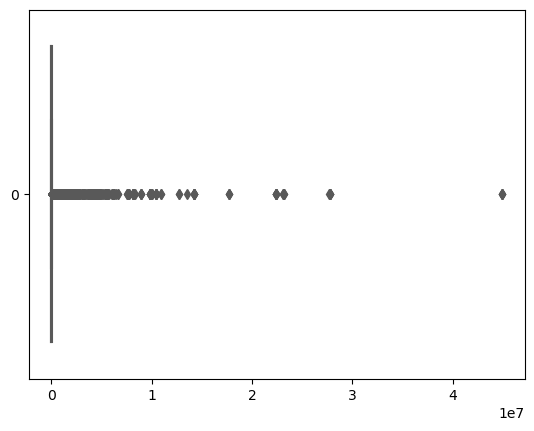

In [28]:
#Outlier Correction
sns.boxplot(data=df['Reviews'],orient="h",palette="Set2")

In [29]:
df["Reviews"].value_counts()

2          80
3          77
5          74
4          71
1          66
           ..
192661      1
54207       1
1335799     1
148506      1
398307      1
Name: Reviews, Length: 4669, dtype: int64

In [32]:
rows=df[df["Reviews"]>2000000].index

In [33]:
df.drop(rows,inplace=True)

In [34]:
#Drop these as most seem to be junk apps

<Axes: >

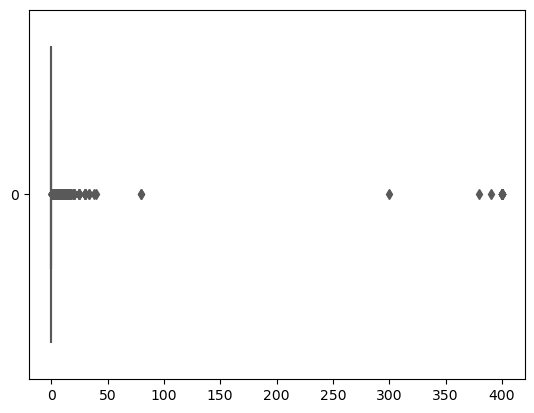

In [36]:
sns.boxplot(data=df['Price'],orient="h",palette="Set2")

In [37]:
rows=df[df["Price"]>200].index

In [38]:
df.drop(rows,inplace=True)

In [39]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<Axes: >

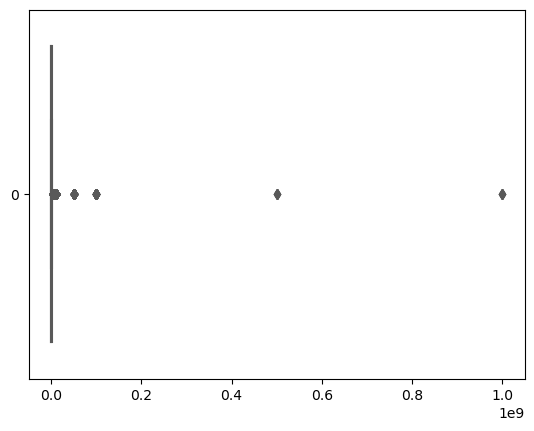

In [41]:
#Outlier Correction
sns.boxplot(data=df['Installs'],orient="h",palette="Set2")

In [43]:
# -Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

#-Decide a threshold as cutoff for outlier and drop records having values more than that
#-There seems to be some outliers in installs field too. Hence setting the threshold at 500000

In [44]:
perc=[.10, .25, .50, .70, .90, .95, .99]
df["Installs"].describe(percentiles=perc)

count    7.483000e+03
mean     3.947465e+06
std      2.781831e+07
min      5.000000e+00
10%      1.000000e+03
25%      1.000000e+04
50%      1.000000e+05
70%      1.000000e+06
90%      1.000000e+07
95%      1.000000e+07
99%      5.000000e+07
max      1.000000e+09
Name: Installs, dtype: float64

C:\Users\varun\AppData\Local\Temp\ipykernel_6352\2628286323.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Installs"],kde=False)


<Axes: xlabel='Installs'>

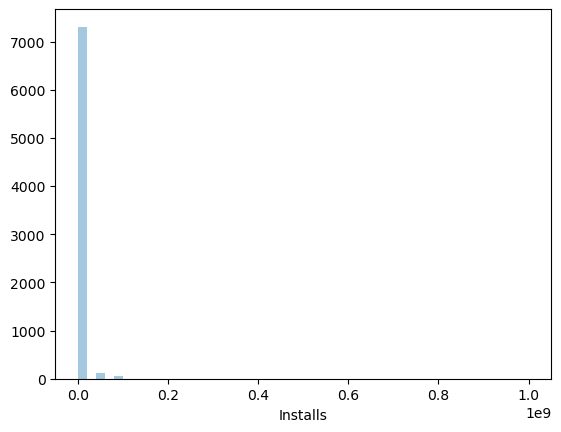

In [51]:
sns.distplot(df["Installs"],kde=False)

In [52]:
rows=df[df["Price"]>500000].index

In [53]:
df.drop(rows,inplace=True)

C:\Users\varun\AppData\Local\Temp\ipykernel_6352\729776272.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Rating"],kde=False)


<Axes: xlabel='Rating'>

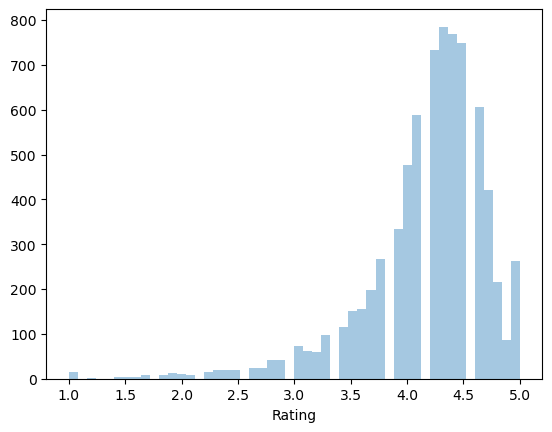

In [54]:
sns.distplot(df["Rating"],kde=False)

C:\Users\varun\AppData\Local\Temp\ipykernel_6352\1818158713.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Size"],kde=False)


<Axes: xlabel='Size'>

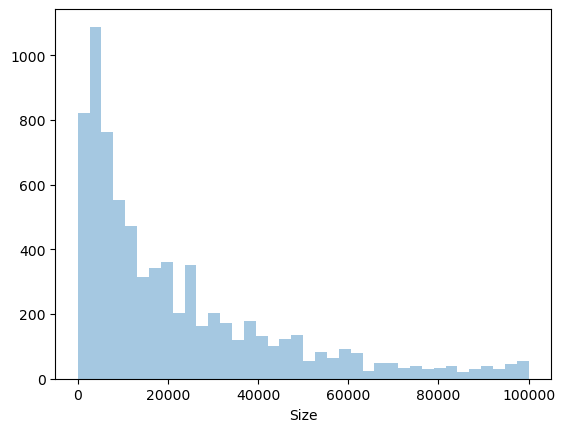

In [55]:
sns.distplot(df["Size"],kde=False)

# Bivariate analysis: 

<Axes: xlabel='Rating', ylabel='Price'>

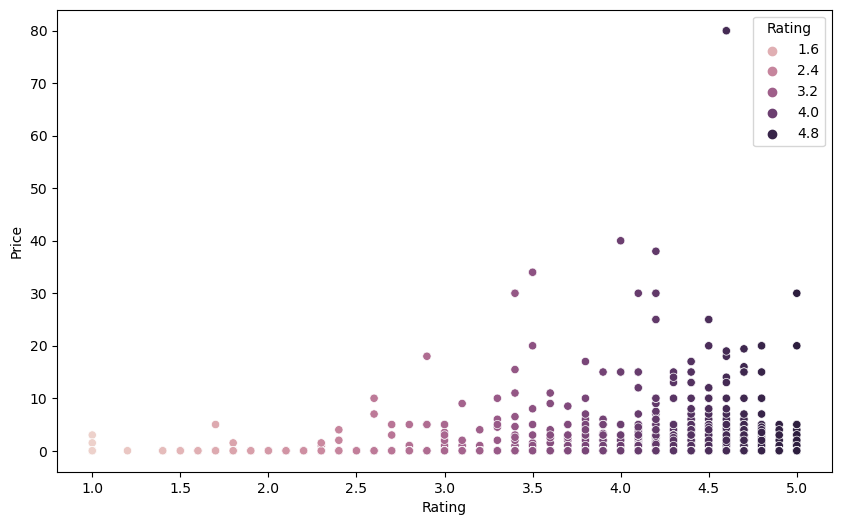

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Rating"],y=df["Price"],hue=df["Rating"])

<Axes: xlabel='Rating', ylabel='Size'>

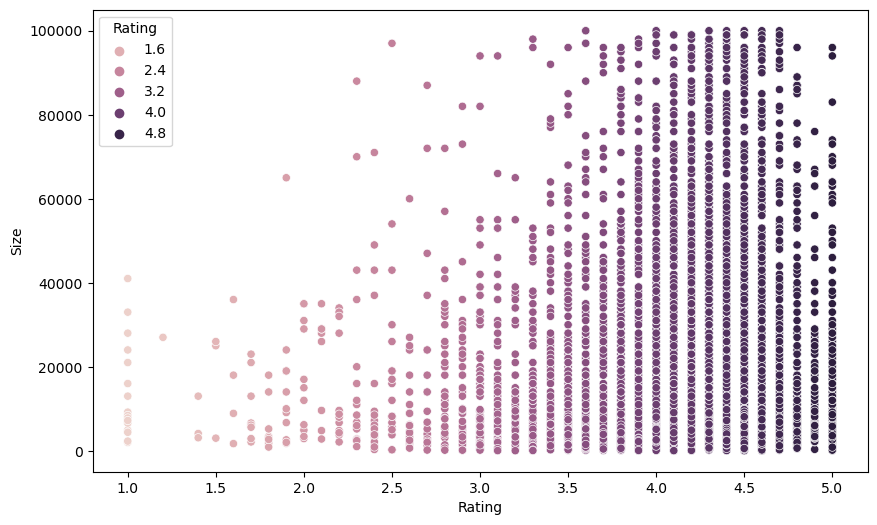

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Rating"],y=df["Size"],hue=df["Rating"])

<Axes: xlabel='Rating', ylabel='Reviews'>

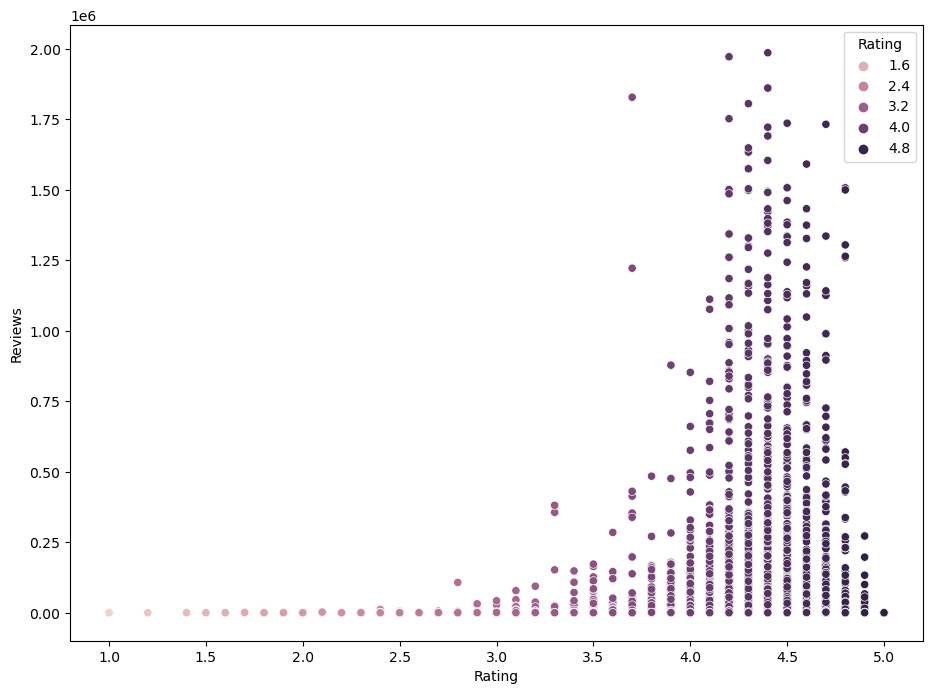

In [58]:
plt.figure(figsize=(11,8))
sns.scatterplot(x=df["Rating"],y=df["Reviews"],hue=df["Rating"])

<Axes: xlabel='Rating', ylabel='Content Rating'>

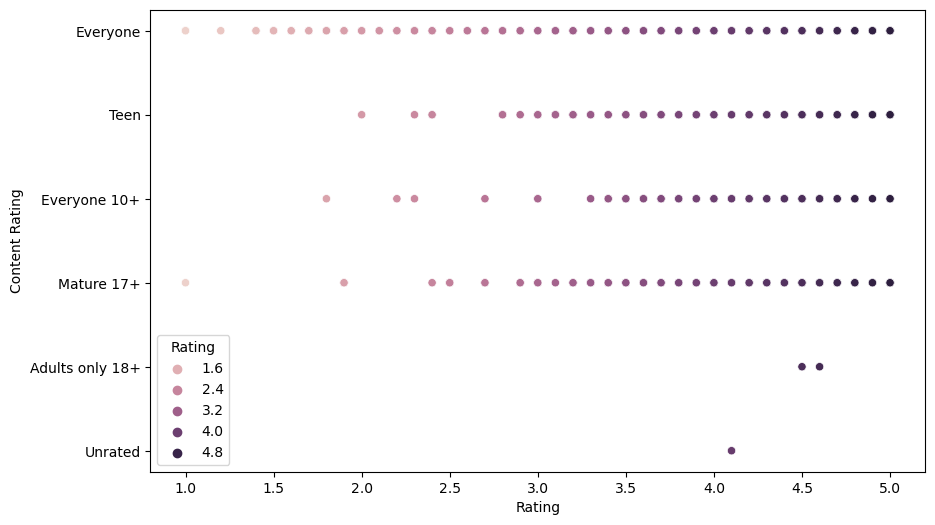

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Rating"],y=df["Content Rating"],hue=df["Rating"])

<Axes: xlabel='Rating', ylabel='Category'>

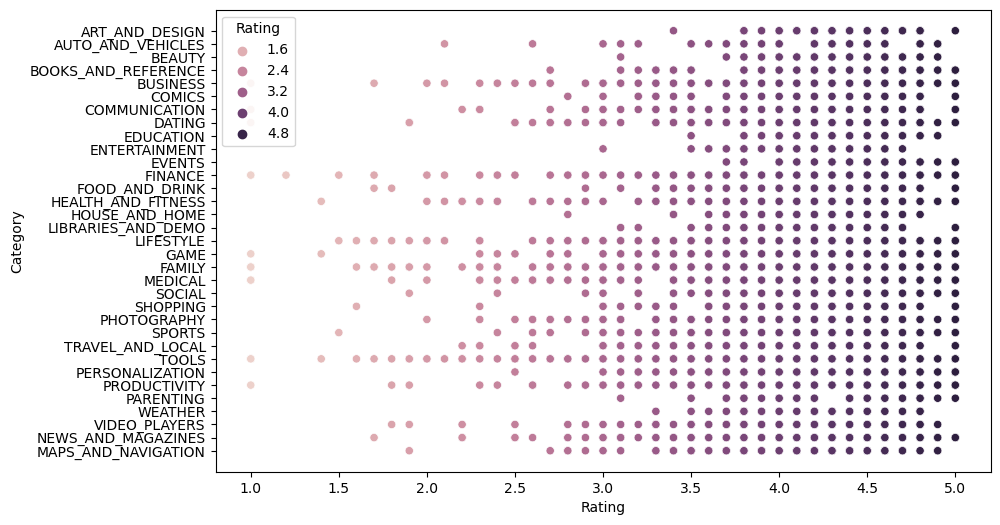

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Rating"],y=df["Category"],hue=df["Rating"])

# Data Preprocessing

In [61]:
inp1 = df.copy()
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [62]:
#Reseting the rows' index
inp1=inp1.reset_index(drop=True)

In [63]:
#Droping all teh unnecessary columns from the dataset
col_useful=['Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Price','Content Rating', 'Genres']
df_useful =inp1[col_useful]

In [64]:
df_useful.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000.0,10000,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2800.0,100000,0.0,Everyone,Art & Design;Creativity


In [65]:
df_useful['log_Installs'] = df_useful['Installs'].apply(np.log1p)

C:\Users\varun\AppData\Local\Temp\ipykernel_6352\302540963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['log_Installs'] = df_useful['Installs'].apply(np.log1p)


In [66]:
df_useful['log_Installs']

0        9.210440
1       13.122365
2       15.424949
3       17.727534
4       11.512935
          ...    
7478     6.908755
7479     6.216606
7480     8.517393
7481     4.615121
7482    16.118096
Name: log_Installs, Length: 7483, dtype: float64

In [67]:
df_useful['log_Reviews'] = np.log1p(df_useful['Reviews'])

C:\Users\varun\AppData\Local\Temp\ipykernel_6352\414248437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['log_Reviews'] = np.log1p(df_useful['Reviews'])


In [68]:
df_useful['log_Reviews'] 

0        5.075174
1        6.875232
2       11.379520
3       12.281389
4        6.875232
          ...    
7478     3.806662
7479     2.079442
7480     3.663562
7481     1.609438
7482    12.894981
Name: log_Reviews, Length: 7483, dtype: float64

In [69]:
#Converting categorical columns to numeric columns
dummy = ['Category', 'Genres','Content Rating']
inp2 = pd.get_dummies(df_useful,columns=dummy,drop_first=True)
inp2.head()

,Rating,Reviews,Size,Installs,Price,log_Installs,log_Reviews,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159,19000.0,10000,0.0,9.210440,5.075174,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,14000.0,500000,0.0,13.122365,6.875232,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,8700.0,5000000,0.0,15.424949,11.379520,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,215644,25000.0,50000000,0.0,17.727534,12.281389,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,967,2800.0,100000,0.0,11.512935,6.875232,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [70]:
df_train=inp2.iloc[:,1:]
df_test=inp2.iloc[:,0]
df_train.shape

(7483, 154)

In [71]:
#Spliting the dataset into training and testing dataset

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train,df_test,test_size=0.3)

machine learning (model building)

In [73]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
model=regressor.fit(X_train, y_train)

In [74]:
#Predicting the Test result

y_pred=model.predict(X_test)

In [75]:
#Finding various metrics for evaluating the regression model from sklearn library

from sklearn.metrics import r2_score,mean_squared_error
print('R2_Score=',r2_score(y_test,y_pred))
print('Root_Mean_Squared_Error(RMSE)=',np.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score= 0.1228978530511744
Root_Mean_Squared_Error(RMSE)= 0.5427793437397055


In [76]:
a=pd.DataFrame({'Actual':y_test,'Predicted':y_pred});a.head(10)

,Actual,Predicted
5098,4.5,4.457942
5501,3.3,3.849888
496,4.2,4.185315
910,4.6,4.474242
3149,4.8,4.259059
2098,4.1,3.605412
6627,4.1,4.176261
1442,4.8,4.639270
4352,4.8,4.315058
4310,4.4,4.517972


 # Conclusion :
    -  With the help of linear regression , the predicted ratings are very cose the the actual ratings 